# Intensive Module in Machine Learning
# Problem set 2: Classification 

If you are looking at the pdf/html version of this document, start by running the command `jupyter notebook` to launch an interactive notebook and then navigate to the correct folder and open this file `problem-set-2.ipynb`. Import your default packages for manipulating data and plotting:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## 1. A toy example for logistic regression

Before going to real-data examples, let us look at a very simple derived example where it is easy to understand the basic concepts.

### 1.1 The sigmoid function

a) A very important function in logistic regression is the sigmoid function, given by $f(y)=e^y/(1+e^y)$. See whether you can mathematically derive the asymptotic behaviour of this function. Confirm your intuition by plotting it using python.

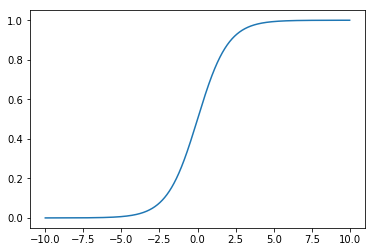

In [3]:
def sigmoid_f(x):
    f = np.exp(x)/(1.0+np.exp(x))
    return f

x_grid = np.arange(-10,10,0.01)
y_values = sigmoid_f(x_grid)

plt.plot(x_grid,y_values)
plt.show()

b) Now set $y=a+bx$ and plot the function $f(a+bx)$ for a number of values for a and b.

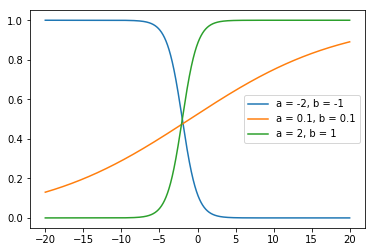

In [7]:
def linear_transform(x,a=1,b=0):
    f = a + b*x
    return f

x_grid = np.arange(-20,20,0.01)

#Let's define some illustratory values for a and b
a = [-2,0.1,2]
b = [-1,0.1,1]

for kk in range(0,len(a)):
    y_values = sigmoid_f(linear_transform(x_grid,a[kk],b[kk]))
    plt.plot(x_grid,y_values, label='a = '+str(a[kk])+', b = '+str(b[kk]))

plt.legend()
plt.show()

### 1.2 Looking at the simple example from Wikipedia

a) We now look at the simple toy example from Wikipedia with data on passing an exam or not as a function of the number of hours studied. Fit a (univariate) logistic regression to the data. For the purpose of this example you can treat the entire data as training data.

In [9]:
#Let's start by loading the data and checking it has properly loaded using the .head() function in pandas
data = pd.read_csv('Wiki-example.csv', sep=",")
data.head()

,hours,passed
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(data[['hours']], data['passed'])

#Let's look at the (training) accuracy of our model
model.score(data[['hours']], data['passed'])

0.8

b) The above example is one-dimensional and has 20 observations. Let's add a second fictious predictor (column) of the number of hours of sleep the student had. Sample 12 normal random numbers with mean=6 and sd=3, followed by 8 normals with mean=8 sd=2. Add those numbers as a new column to your data called sleep. Now fit a multi-variate logistic regression model. The nice thing about this two-dimensional example is that we can plot it which helps us to understand better what's going on. Plot the data points in the (hours studied, hours slept) space, labelling data point according to their labels (e.g. square for passed, triangle for not passed). Add the decision boundary to your plot.

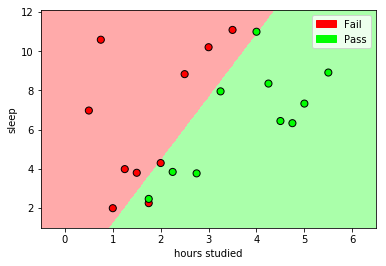

In [11]:
#First create the new column using the np.random.normal function
new_column = np.random.normal(6,3,12)
new_column = np.append(new_column,np.random.normal(8,2,8))
#Add the new column to the dataframe and fit the multi-variate logisitic regression model
data = data.assign(sleep=new_column)
model2 = LogisticRegression().fit(data[['hours','sleep']], data['passed'])

c = model2.predict(data[['hours','sleep']])
x,y,c = data['hours'],data['sleep'],data['passed']

# Plot the decision boundary by assigning a color in the color map to each mesh point.   

# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])

mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50
    
x_min, x_max = data['hours'].min() - 1, data['hours'].max() + 1
y_min, y_max = data['sleep'].min() - 1, data['sleep'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x, y, s=plot_symbol_size,cmap = cmap_bold, c=c, edgecolor = 'black')
plt.xlabel('hours studied')
plt.ylabel('sleep')

#add a legend
import matplotlib.patches as mpatches
patch0 = mpatches.Patch(color='#FF0000', label='Fail')
patch1 = mpatches.Patch(color='#00FF00', label='Pass')
plt.legend(handles=[patch0, patch1])

plt.show()

## 2. Spam Data: classifying emails for spam

a) Split the Spam data into a training and test set. Fit a logistic regression classifier to the data. Test your performance in terms of missclassification error on the test set.

In [12]:
data = pd.read_csv('Spam_Data.txt', sep=",", header=None)

#Fix random seed for reproducability
np.seed = 20

#Split data into training and testing data
mask = np.random.rand(len(data)) < 0.667
train = data[mask]
test = data[~mask]

#Train and test model
model3 = LogisticRegression().fit(train.loc[:, range(0,57)], train.loc[:, 57])
model3.score(test.loc[:, range(0,57)], test.loc[:, 57])

0.929192546583851

b) Apart from the missclassification error also look at other metrics such as the confusion matrix and ROC curve

In [13]:
#Let's look at the confusion matrix for the test data

from sklearn.metrics import confusion_matrix
y_true = test.loc[:, 57]
y_pred = model3.predict(test.loc[:, range(0,57)])
print(confusion_matrix(y_true, y_pred))

[[920  41]
 [ 73 576]]


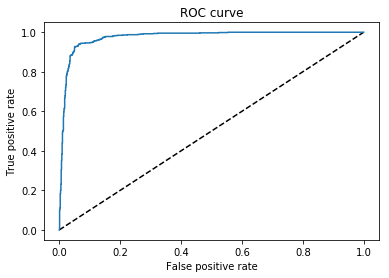

In [14]:
#Let's look at the ROC curve for the test data
from sklearn.metrics import roc_curve

y_pred = model3.predict_proba(test.loc[:, range(0,57)])[:, 1]
fpr, tpr, _ = roc_curve(y_true, y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

c) Imagine that we attach a higher cost to missing an important email, than to reading a spam eamil. Thus, for example, we want to make sure that the amount of non-spam emails wrongly classified as spam is less than 1%. Ajust the threshold probability in your model to skew the classifier to achieve this.

In [15]:
#First, we write a function that shifts the threshold probability in our model,
#i.e. only classifies something as spam if the probability of the model is greater or equal a specified threshold
def adjusted_prediction(y_proba,threshold = 0.5):
    y_pred = np.zeros(len(y_proba))
    y_pred[y_proba >= threshold] = 1
    return y_pred

#Subsequently, playing around with the threshold and analysing the confusion matrix 
#to check whether the goal of less than 1% is achieved
threshold = 0.9

y_true = train.loc[:, 57]
y_pred = adjusted_prediction(model3.predict_proba(train.loc[:, range(0,57)])[:, 1],threshold)
print(confusion_matrix(y_true, y_pred))

[[1807   20]
 [ 474  690]]


<span style="color:blue">For threshold 0.9, we have only 19 non-spam messages out of 1857 which are classfied as spam (about 1%)</span>

d) (optional challange) If you finish early with all the other exercises and want to prepare for next week, you might try this exercise. Note however that it requires some background reading. Let's view the logistic regression performed above as a one layer neural network, use TensorFlow to fit the logistic regression using gradient descent. 

<span style="color:blue"> Will be revisited in example solutions next week. </span>

## 3. Linear and Quadratic Discriminant Analysis

### 3.1 . Linear discriminant analysis

In the lectures we learned about linear discriminant analysis. Go back to the Spam data set as analysed in the previous exercise and fit a linear discriminant analysis (LDA) model. Compare it to the logistic regression results. What have both models conceptually in common?

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model4 = LinearDiscriminantAnalysis()
model4.fit(train.loc[:, range(0,57)], train.loc[:, 57])

print('Test accuracy Logistic Regression model =',model3.score(test.loc[:, range(0,57)], test.loc[:, 57]))
print('Test accuracy LDA model =',model4.score(test.loc[:, range(0,57)], test.loc[:, 57]))

Test accuracy Logistic Regression model = 0.929192546583851
Test accuracy LDA model = 0.886335403726708


<span style="color:blue"> Both models find a linear decision boundary in the input space (for Logistic Regression, this can be seen in plot of Exercise 1b) </span>

### 3.2 . Quadratic discriminant analysis

Now repeat the same with a quatradic discriminant analysis (QDA) model. How do the results compare to the above? How does the decision boundary differ?

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model5 = QuadraticDiscriminantAnalysis()
model5.fit(train.loc[:, range(0,57)], train.loc[:, 57])

print('Test accuracy QDA model =',model5.score(test.loc[:, range(0,57)], test.loc[:, 57]))


Test accuracy QDA model = 0.8316770186335404


<span style="color:blue"> While the decision boundary of the LDA model is always linear, the decision boundary of the QDA model can be non-linear (quadratic). However in the given example, linear separation seems to be superior, as the test accuracy of the QDA model is inferior. Note also the possible numerical instabilities during matrix inversion if variables are found to be collinear might additionally decrease model performance of QDA. </span>